In [2]:
import pandas as pd
import numpy as np

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target =raw_df.values[1::2, 2]

In [4]:
# 1. 데이터셋 준비
x = pd.DataFrame(data, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
y = pd.DataFrame(target, columns=["PRICE"])

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
# depth를 제한해서 오버핏팅을 방지한다.
model = DecisionTreeRegressor(max_depth=4)

In [15]:
model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [16]:
predict = model.predict(x_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
print(model.score(x_test, y_test))
print(r2_score(y_test, predict))

0.8646893116543823
0.8646893116543823


In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

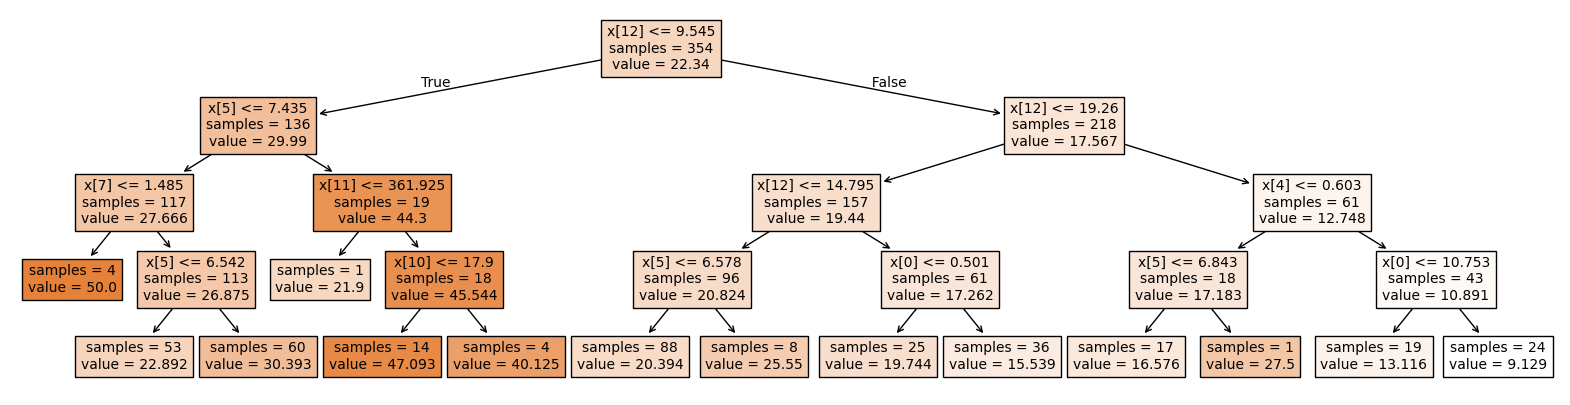

In [20]:
plt.figure(figsize=(20,5))
plot_tree(model, impurity=False, filled=True, fontsize=10)
plt.show()